In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

In [2]:
def PCA(data, dims=2):
    
    data -= data.mean(axis=0)
    C = np.cov(data, bias=True, rowvar=False)
    
    E, V = la.eigh(C)
    idx = np.argsort(E)[::-1]
    E = E[idx]
    V = V[:,idx]
    
    
    V = V[:, :dims]
    U = data @ V
    
    return U, V, E

## Dataset preparation

In [3]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

## Testing my realization of PCA

In [4]:
X, *_ = PCA(X, 2)
X

array([[ -1.25946645,  21.27488348],
       [  7.9576113 , -20.76869896],
       [  6.99192297,  -9.95598641],
       ..., 
       [ 10.8012837 ,  -6.96025223],
       [ -4.87210009,  12.42395362],
       [ -0.34438963,   6.36554919]])

## Comparing with sklearn implementation

In [5]:
from sklearn.decomposition import PCA as PCA_sklearn

pca = PCA_sklearn(n_components=2)
pca.fit(X)
pca.fit_transform(X)

array([[ -1.25946645,  21.27488348],
       [  7.9576113 , -20.76869896],
       [  6.99192297,  -9.95598641],
       ..., 
       [ 10.8012837 ,  -6.96025223],
       [ -4.87210009,  12.42395362],
       [ -0.34438963,   6.36554919]])

## Visualization of 2D reduced data

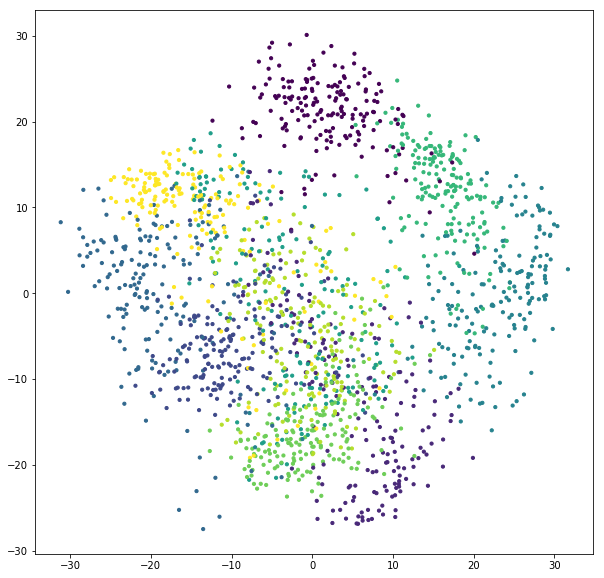

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)